In [11]:
import numpy as np
import matplotlib.pyplot as plt



The potential for a finite well is given by
$$
\begin{equation}
    V(x) = \begin{cases}
        V_0,\,&|x|> a\\
        0,\,&|x|\leq a
    \end{cases}
\end{equation}
$$

First we set up all the neccessary parameter

In [12]:
a = 1 #width of the well
V0 = 1 #depth of the well
L = 10
N = 1000

x = np.linspace(-L,L,N)
V = np.zeros((N,N),dtype=float)
T = np.zeros((N,N), dtype=float)

Now, we will working on the Potential matrix and kinetic matrix:
$$(V)_{i,j} = \begin{cases}
V_0,\quad (i=j)\\0, \quad (i \neq j)
\end{cases}$$
For the kinetic matrix, we have the difinition:
$$T = -\frac{\hbar^2}{2m} \nabla^2$$
Approximating it by as:
$$(T)_{i,i+1} = -\frac{\hbar^2}{2m \Delta}$$
$$(T)_{i,i-1} = -\frac{\hbar^2}{2m \Delta}$$
$$(T)_{i,i} = \frac{\hbar^2}{m\Delta^2}$$

In [13]:
for i in range(N) :
    if x[i] < -a or x[i] > a :
        V[i,i] = V0
    else :
        V[i,i] = 0
for i in range(N) :
    T[i,i] = -2
    if i > 0 :
        T[i,i-1] = 1
    if i < N-1 :
        T[i,i+1] = 1

T = -T/(x[1]-x[0])**2

print(T) 


[[ 4990.005  -2495.0025    -0.     ...    -0.        -0.        -0.    ]
 [-2495.0025  4990.005  -2495.0025 ...    -0.        -0.        -0.    ]
 [   -0.     -2495.0025  4990.005  ...    -0.        -0.        -0.    ]
 ...
 [   -0.        -0.        -0.     ...  4990.005  -2495.0025    -0.    ]
 [   -0.        -0.        -0.     ... -2495.0025  4990.005  -2495.0025]
 [   -0.        -0.        -0.     ...    -0.     -2495.0025  4990.005 ]]


To check the condition, let plot the potential:

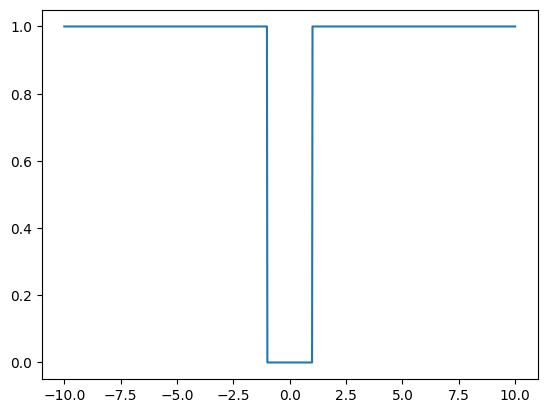

In [14]:
Vdiag = np.diag(V)
plt.plot(x,Vdiag)
plt.show()

[5.45791148e-01 1.08863531e+00 1.13634055e+00 1.35924422e+00
 1.51707816e+00 1.82158321e+00 2.11161817e+00 2.48385995e+00
 2.90724635e+00 3.35046403e+00 3.89767292e+00 4.42262665e+00
 5.07931328e+00 5.69949621e+00 6.45104177e+00 7.17890527e+00
 8.01424282e+00 8.85791939e+00 9.77204858e+00 1.07333613e+01
 1.17278750e+01 1.28024176e+01 1.38840637e+01 1.50632875e+01
 1.62412438e+01 1.75156657e+01 1.87984300e+01 2.01607765e+01
 2.15535580e+01 2.30008298e+01 2.45041894e+01 2.60381027e+01
 2.76482225e+01 2.92740753e+01 3.09844752e+01 3.27089781e+01
 3.45129791e+01 3.63418375e+01 3.82348560e+01 4.01708949e+01
 4.21517955e+01 4.41942078e+01 4.62653434e+01 4.84102496e+01
 5.05763019e+01 5.28183421e+01 5.50844634e+01 5.74187862e+01
 5.97887246e+01 6.22126373e+01 6.46874838e+01 6.72012070e+01
 6.97791628e+01 7.23854960e+01 7.50626825e+01 7.77657837e+01
 8.05377443e+01 8.33415138e+01 8.62048230e+01 8.91114814e+01
 9.20648740e+01 9.50742253e+01 9.81188717e+01 1.01228477e+02
 1.04367365e+02 1.075735

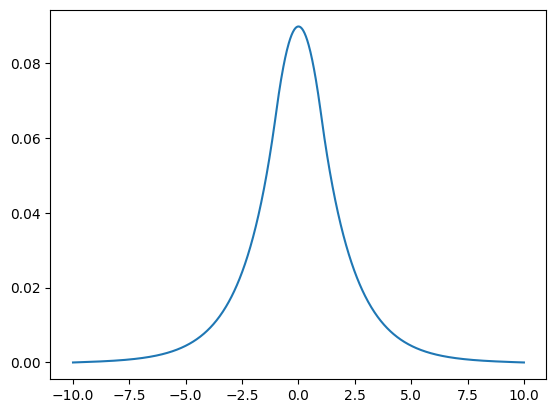

In [15]:
H = T + V
E, psi = np.linalg.eigh(H)
print(E)
plt.plot(x,psi[:,0])